In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

df1 = pd.read_csv('附件1企业信息.csv')
df2 = pd.read_csv('附件1进项发票.csv')
df3 = pd.read_csv('附件1销项发票.csv')


In [2]:
print(df1.isnull().any())
print(df2.isnull().any())
print(df3.isnull().any())


企业代号    False
企业名称    False
信誉评级    False
是否违约    False
dtype: bool
企业代号      False
发票号码      False
开票日期      False
销方单位代号    False
金额        False
税额        False
价税合计      False
发票状态      False
dtype: bool
企业代号      False
发票号码      False
开票日期      False
购方单位代号    False
金额        False
税额        False
价税合计      False
发票状态      False
dtype: bool


In [3]:
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)


企业代号    object
企业名称    object
信誉评级    object
是否违约    object
dtype: object
企业代号       object
发票号码        int64
开票日期       object
销方单位代号     object
金额        float64
税额        float64
价税合计      float64
发票状态       object
dtype: object
企业代号       object
发票号码        int64
开票日期       object
购方单位代号     object
金额        float64
税额        float64
价税合计      float64
发票状态       object
dtype: object


In [4]:
temp=df1.信誉评级.str.contains('A')
As=[]
for i in temp:
    if i==True:
        As.append(i)
print(len(As))
temp=df1.信誉评级.str.contains('B')
for i in temp:
    if i==True:
        As.append(i)
print(len(As))
temp=df1.信誉评级.str.contains('C')
for i in temp:
    if i==True:
        As.append(i)
print(len(As))
temp=df1.信誉评级.str.contains('D')
for i in temp:
    if i==True:
        As.append(i)
print(len(As))
X=df1[['信誉评级','是否违约']].values
#print(X)
vioA=0
vioB=0
vioC=0
vioD=0
for i in range(123):
    if ((X[i][0]=='A') and (X[i][1]=='是')):
         vioA=vioA+1
    elif ((X[i][0]=='B') and (X[i][1]=='是')):
         vioB=vioB+1
    elif ((X[i][0]=='C') and (X[i][1]=='是')):
         vioC=vioC+1
    elif ((X[i][0]=='D') and (X[i][1]=='是')):
         vioD=vioD+1
print(vioA,vioB,vioC,vioD)


27
65
99
123
0 1 2 24


In [5]:
invalid2 = df2.发票状态.str.contains('废')
invalid3 = df3.发票状态.str.contains('废')
df2 = df2.loc[~invalid2]
df3 = df3.loc[~invalid3]
print(len(df2),len(df3))


203339 151278


In [6]:
group_by_企业代号2 = df2.loc[:, ['企业代号','发票号码','开票日期','销方单位代号','金额','税额','价税合计','发票状态']].groupby('企业代号')
sum=group_by_企业代号2.sum()
Deno2=sum.金额
Tax2=sum.税额
价税合计2=sum.价税合计
pd.set_option('display.max_rows',None)


In [7]:
temp=df2.企业代号
进项数=np.zeros(124)
j=1
for temp in temp:
    if temp=='E'+(str(j)):
        进项数[j]=进项数[j]+1
    else:
        j=j+1
        进项数[j]=进项数[j]+1
r1=DataFrame(进项数)
r1.to_excel('附件一各公司进项数.xlsx')


In [8]:
s1=DataFrame(Deno2)
s2=DataFrame(Tax2)
s3=DataFrame(价税合计2)
s1.to_excel('附件一进项总金额.xlsx')
s2.to_excel('附件一进项总税额.xlsx')
s3.to_excel('附件一进项价税合计.xlsx')


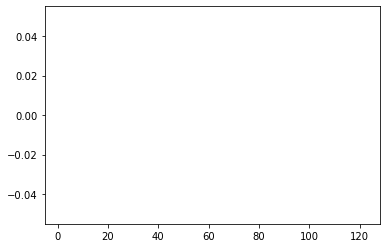

In [9]:
s=DataFrame(sum.金额)
bin_sizes, _, _ = plt.hist(s, bins=range(1, 123))

In [10]:
group_by_企业代号3 = df3.loc[:, ['企业代号','发票号码','开票日期','购方单位代号','金额','税额','价税合计','发票状态']].groupby('企业代号')
sum=group_by_企业代号3.sum()
Deno3=sum.金额
Tax3=sum.税额
价税合计3=sum.价税合计


In [11]:
temp=df3.企业代号
销项数=np.zeros(124)
j=1
for temp in temp:
    if temp=='E'+(str(j)):
        销项数[j]=销项数[j]+1
    else:
        j=j+1
        销项数[j]=销项数[j]+1
r2=DataFrame(销项数)
r2.to_excel('附件一各公司销项数.xlsx')


In [12]:
s1=DataFrame(Deno3)
s2=DataFrame(Tax3)
s3=DataFrame(价税合计3)
s1.to_excel('附件一销项总金额.xlsx')
s2.to_excel('附件一销项总税额.xlsx')
s3.to_excel('附件一销项价税合计.xlsx')
